# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# <Student to fill this section>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import requests
import zipfile
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Afraz Ul Haque"
student_id = "25627377"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [7]:
# <Student to fill this section>
business_use_case_description = """
The goal of this project is to predict whether it will rain in the next 7 days based on current weather conditions.
This is a binary classification problem where we aim to forecast precipitation events up to a week in advance.
The model will help in weather forecasting, agricultural planning, event management, and disaster preparedness.
By analyzing historical weather patterns and current meteorological conditions, we can provide early warnings
for precipitation events that may impact various business operations and daily activities.
"""

In [8]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [9]:
# <Student to fill this section>
business_objectives = """
Accurate predictions will enable: 1) Farmers to plan irrigation and crop protection activities,
2) Event organizers to make informed decisions about outdoor events, 3) Transportation companies to
prepare for weather-related disruptions, 4) Emergency services to pre-position resources.
Incorrect results could lead to: 1) False positives - unnecessary preparation costs and canceled events,
2) False negatives - crop damage, unprepared emergency response, safety hazards, and financial losses.
The cost of false negatives (missing rain events) is typically higher than false positives
due to potential damage and safety concerns.
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [11]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The predictions will be used by: 1) Agricultural sector - farmers and crop managers for irrigation scheduling
and crop protection decisions, 2) Event management companies - for outdoor event planning and contingency
preparations, 3) Transportation and logistics - for route planning and resource allocation,
4) Emergency services - for disaster preparedness and resource positioning, 5) Insurance companies -
for risk assessment and premium calculations. All stakeholders expect reliable advance warnings
with acceptable false positive rates to minimize unnecessary costs while ensuring safety and preparedness.
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [13]:
# <Student to fill this section>
daily_df = pd.read_csv('../data/raw/daily_with_targets.csv')
hourly_df = pd.read_csv('../data/raw/hourly_with_targets.csv')

### C.2 Define Target variable

In [14]:
# <Student to fill this section>
daily_df.head()

,date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,pressure_msl_mean,wind_speed_10m_max,wind_speed_10m_mean,wind_direction_10m_dominant,precipitation_sum,rain_sum,shortwave_radiation_sum,daylight_duration,rain_in_7_days
0,2020-01-01,23.9,19.2,21.6,82,56,1014.3,19.6,16.3,168,0.0,0.0,28.18,51704.47,1
1,2020-01-02,25.2,20.2,22.1,86,55,1017.9,19.5,14.3,137,0.9,0.9,24.85,51671.07,1
2,2020-01-03,28.8,20.8,23.7,95,56,1014.4,26.3,14.4,67,1.7,1.7,26.92,51634.70,0
3,2020-01-04,41.8,19.9,29.4,97,18,1008.0,41.8,15.5,29,0.0,0.0,28.23,51595.43,1
4,2020-01-05,24.4,20.4,21.9,73,59,1017.9,34.6,24.8,169,0.2,0.2,22.91,51553.35,1


In [15]:
daily_df['rain_in_7_days'].value_counts()

rain_in_7_days
1    1240
0     768
Name: count, dtype: int64

In [16]:
target_col = 'rain_in_7_days'

In [17]:
# <Student to fill this section>
target_definition_explanations = """
The target variable 'rain_in_7_days' is a binary classification target that indicates whether precipitation
will occur within the next 7 days (1 = rain expected, 0 = no rain expected). This 7-day forecast window
is strategically chosen because it provides sufficient lead time for stakeholders to take preventive actions
while maintaining reasonable prediction accuracy. A 7-day horizon allows farmers to adjust irrigation schedules,
event planners to make venue decisions, and emergency services to prepare resources. The binary nature
simplifies decision-making compared to regression models that predict exact precipitation amounts.
"""

In [18]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

---
## D. Feature Selection


### D.1 Approach "\<describe_approach_here\>"


In [19]:
# <Student to fill this section>

In [20]:
daily_df.columns

Index(['date', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'relative_humidity_2m_max',
       'relative_humidity_2m_min', 'pressure_msl_mean', 'wind_speed_10m_max',
       'wind_speed_10m_mean', 'wind_direction_10m_dominant',
       'precipitation_sum', 'rain_sum', 'shortwave_radiation_sum',
       'daylight_duration', 'rain_in_7_days'],
      dtype='object')

In [21]:

daily_df['date'] = pd.to_datetime(daily_df['date'], format='%Y-%m-%d', errors='coerce')
daily_df['day'] = daily_df['date'].dt.day
daily_df['month'] = daily_df['date'].dt.month
daily_df['year'] = daily_df['date'].dt.year

In [22]:
# <Student to fill this section>
feature_selection_1_insights = """
provide an explanation on why you use this approach for feature selection and describe its results
"""

In [23]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "\<describe_approach_here\>"


In [24]:
# <Student to fill this section>

Correlation with target (signed):
daylight_duration              0.233749
temperature_2m_mean            0.231480
temperature_2m_min             0.220343
temperature_2m_max             0.190456
shortwave_radiation_sum        0.141567
relative_humidity_2m_max       0.074068
relative_humidity_2m_min       0.062105
precipitation_sum              0.050271
rain_sum                       0.050271
wind_speed_10m_max             0.046048
wind_speed_10m_mean            0.022265
day                           -0.015570
year                          -0.015576
month                         -0.059396
pressure_msl_mean             -0.092252
wind_direction_10m_dominant   -0.136258


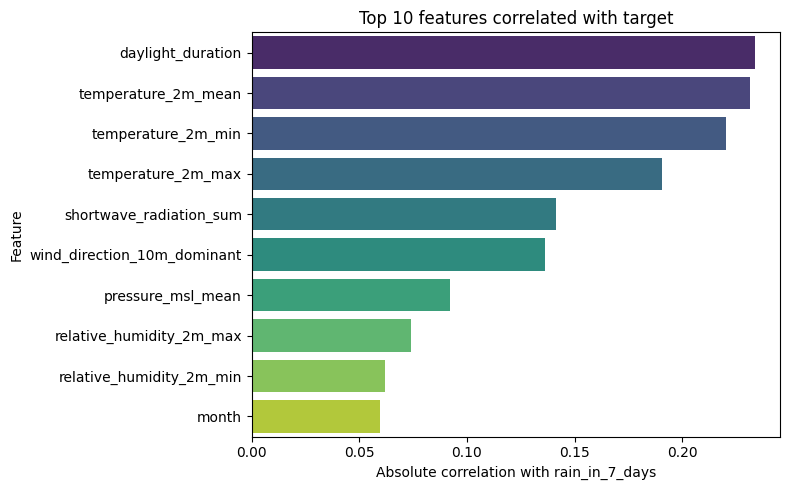

In [25]:

assert target_col in daily_df.columns, f"Target column '{target_col}' not found in daily_df."

numeric_cols = daily_df.select_dtypes(include=[np.number]).columns
corr_matrix = daily_df[numeric_cols].corr(numeric_only=True)

# Correlations with target (signed) and by absolute magnitude
target_corr = corr_matrix[target_col].drop(labels=[target_col]).sort_values(ascending=False)
abs_target_corr = target_corr.abs().sort_values(ascending=False)

print("Correlation with target (signed):")
print(target_corr.to_string())

# Plot top 10 features by absolute correlation
top_n = 10
top_features = abs_target_corr.head(top_n).index
plt.figure(figsize=(8, 5))
sns.barplot(
    x=abs_target_corr.loc[top_features].values,
    y=top_features,
    orient='h',
    palette='viridis'
)
plt.xlabel('Absolute correlation with rain_in_7_days')
plt.ylabel('Feature')
plt.title(f'Top {min(top_n, len(top_features))} features correlated with target')
plt.tight_layout()
plt.show()

In [26]:
# <Student to fill this section>
feature_selection_2_insights = """
provide an explanation on why you use this approach for feature selection and describe its results
"""

In [27]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "\<describe_approach_here\>"

> You can add more cells related to other approaches in this section

In [28]:
daily_df.columns

Index(['date', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'relative_humidity_2m_max',
       'relative_humidity_2m_min', 'pressure_msl_mean', 'wind_speed_10m_max',
       'wind_speed_10m_mean', 'wind_direction_10m_dominant',
       'precipitation_sum', 'rain_sum', 'shortwave_radiation_sum',
       'daylight_duration', 'rain_in_7_days', 'day', 'month', 'year'],
      dtype='object')

## D.z Final Selection of Features

In [29]:
# <Student to fill this section>

features_list = ['date', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'relative_humidity_2m_max',
       'relative_humidity_2m_min', 'pressure_msl_mean', 'wind_speed_10m_max',
       'wind_speed_10m_mean', 'wind_direction_10m_dominant',
       'precipitation_sum', 'rain_sum', 'shortwave_radiation_sum',
       'daylight_duration', 'rain_in_7_days']

In [30]:
# <Student to fill this section>
feature_selection_explanations = """
provide a quick explanation on the features selected
"""

In [31]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [32]:
# <Student to fill this section>

In [33]:
# Chronological 80/20 split on daily_df
assert 'date' in daily_df.columns, "Expected a 'date' column in daily_df."

_df = daily_df.sort_values('date').reset_index(drop=True)

X = _df.drop(columns=[target_col])
y = _df[target_col]

split_idx = int(0.8 * len(_df))

X_train = X.iloc[:split_idx].reset_index(drop=True)
y_train = y.iloc[:split_idx].reset_index(drop=True)

X_test = X.iloc[split_idx:].reset_index(drop=True)
y_test = y.iloc[split_idx:].reset_index(drop=True)

print(f"Train size: {len(X_train)} rows, Test size: {len(X_test)} rows")

Train size: 1606 rows, Test size: 402 rows


In [34]:
# <Student to fill this section>
data_splitting_explanations = """
Provide some explanations on what is the best strategy to use for data splitting for this dataset
"""

In [35]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "\<put_name_here\>"

In [36]:
# <Student to fill this section>

In [37]:

for _name in ('X', 'X_train', 'X_test'):
    _df = globals().get(_name, None)
    if isinstance(_df, pd.DataFrame) and 'date' in _df.columns:
        globals()[_name] = _df.drop(columns=['date'])

if 'features_list' in globals():
    features_list = [c for c in features_list if c != 'date']

In [38]:
# <Student to fill this section>
data_transformation_1_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## H. Save Datasets

> Do not change this code

In [40]:
'''# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)'''

"# Do not modify this code\n# Save training set\ntry:\n  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)\n  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)\n\n  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)\n  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)\n\n  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)\n  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)\nexcept Exception as e:\n  print(e)"

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [41]:
# <Student to fill this section>

In [42]:
# <Student to fill this section>
performance_metrics_explanations = """
Provide some explanations on why you believe the performance metrics you chose is appropriate
"""

In [43]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [44]:
! pip install xgboost


In [45]:
# <Student to fill this section>
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from xgboost import XGBClassifier


In [46]:
results = {}

In [47]:
# Train and evaluate baseline and tree-based classifiers on the prepared splits

def _compute_metrics(y_true, y_pred, y_proba_pos):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='binary', zero_division=0
    )
    try:
        auc = roc_auc_score(y_true, y_proba_pos)
    except Exception:
        auc = float('nan')
    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': auc,
    }

def _fit_and_eval(name, model, X_train, y_train, X_test, y_test, store_preds=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Use positive class probability if available
    if hasattr(model, "predict_proba"):
        y_proba_pos = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        # Fallback to decision_function if available (will scale for AUC)
        y_proba_pos = model.decision_function(X_test)
    else:
        # As a last resort, use predictions (not ideal for AUC)
        y_proba_pos = y_pred

    metrics = _compute_metrics(y_test, y_pred, y_proba_pos)
    entry = {'model': model, **metrics}
    if store_preds:
        entry.update({'y_pred': y_pred, 'y_proba': y_proba_pos})
    results[name] = entry
    return entry

# Models
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
xgb_clf = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1,
    tree_method='hist'
)

# Fit and evaluate
_ = _fit_and_eval("DummyClassifier", dummy_clf, X_train, y_train, X_test, y_test)
_ = _fit_and_eval("RandomForestClassifier", rf_clf, X_train, y_train, X_test, y_test)
_ = _fit_and_eval("XGBClassifier", xgb_clf, X_train, y_train, X_test, y_test)

# Compact summary
summary_df = pd.DataFrame.from_dict(results, orient='index')[
    ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
].sort_values(by='f1', ascending=False)

print(summary_df.to_string(float_format=lambda v: f"{v:.4f}"))

                        accuracy  precision  recall     f1  roc_auc
DummyClassifier           0.5796     0.5796  1.0000 0.7339   0.5000
RandomForestClassifier    0.6020     0.6337  0.7425 0.6838   0.6261
XGBClassifier             0.5970     0.6437  0.6824 0.6625   0.5957


In [48]:
from sklearn.model_selection import TimeSeriesSplit


feat_top = list(top_features)

tscv = TimeSeriesSplit(n_splits=3)

rf_base = RandomForestClassifier(
    n_estimators=400,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)
rf_grid = {
    'max_depth': [None, 12],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
}
rf_gs = GridSearchCV(
    rf_base, rf_grid, scoring='f1', cv=tscv, n_jobs=-1, refit=True, verbose=0
)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_

_ = _fit_and_eval("RandomForest_tuned", rf_best, X_train, y_train, X_test, y_test)


rf_best_top = RandomForestClassifier(**rf_best.get_params())
_ = _fit_and_eval(
    "RandomForest_tuned_topk",
    rf_best_top.fit(X_train[feat_top], y_train),
    X_train[feat_top],
    y_train,
    X_test[feat_top],
    y_test
)


pos = (y_train == 1).sum()
neg = len(y_train) - pos
pos_weight = (neg / max(pos, 1))

xgb_base = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss',
    tree_method='hist',
    scale_pos_weight=pos_weight
)
xgb_grid = {
    'n_estimators': [400],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_lambda': [1.0, 3.0],
}
xgb_gs = GridSearchCV(
    xgb_base, xgb_grid, scoring='f1', cv=tscv, n_jobs=-1, refit=True, verbose=0
)
xgb_gs.fit(X_train, y_train)
xgb_best = xgb_gs.best_estimator_

_ = _fit_and_eval("XGBClassifier_tuned", xgb_best, X_train, y_train, X_test, y_test)


xgb_best_top = XGBClassifier(**xgb_best.get_params())
_ = _fit_and_eval(
    "XGBClassifier_tuned_topk",
    xgb_best_top.fit(X_train[feat_top], y_train),
    X_train[feat_top],
    y_train,
    X_test[feat_top],
    y_test
)


summary_df = pd.DataFrame.from_dict(results, orient='index')[
    ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
].sort_values(by='f1', ascending=False)
print(summary_df.to_string(float_format=lambda v: f"{v:.4f}"))

print("\nBest params:")
print(f"RF:  {rf_gs.best_params_}")
print(f"XGB: {xgb_gs.best_params_}  (scale_pos_weight={pos_weight:.3f})")

                          accuracy  precision  recall     f1  roc_auc
DummyClassifier             0.5796     0.5796  1.0000 0.7339   0.5000
RandomForest_tuned          0.6144     0.6291  0.8155 0.7103   0.6161
RandomForest_tuned_topk     0.5995     0.6224  0.7854 0.6945   0.5885
RandomForestClassifier      0.6020     0.6337  0.7425 0.6838   0.6261
XGBClassifier               0.5970     0.6437  0.6824 0.6625   0.5957
XGBClassifier_tuned         0.5871     0.6463  0.6352 0.6407   0.6078
XGBClassifier_tuned_topk    0.5473     0.6049  0.6309 0.6176   0.5584

Best params:
RF:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1}
XGB: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 400, 'reg_lambda': 1.0, 'subsample': 0.8}  (scale_pos_weight=0.595)


In [49]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
"""

In [50]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [51]:
# <Student to fill this section>

In [52]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [53]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [54]:
# <Student to fill this section>

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [55]:
# <Student to fill this section>

In [56]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

In [57]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [58]:
# <Student to fill this section>

In [59]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [60]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [61]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [62]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [63]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.
"""

In [64]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)

In [66]:
summary_df

,accuracy,precision,recall,f1,roc_auc
DummyClassifier,0.579602,0.579602,1.000000,0.733858,0.500000
RandomForest_tuned,0.614428,0.629139,0.815451,0.710280,0.616134
RandomForest_tuned_topk,0.599502,0.622449,0.785408,0.694497,0.588542
RandomForestClassifier,0.601990,0.633700,0.742489,0.683794,0.626102
XGBClassifier,0.597015,0.643725,0.682403,0.662500,0.595678
XGBClassifier_tuned,0.587065,0.646288,0.635193,0.640693,0.607791
XGBClassifier_tuned_topk,0.547264,0.604938,0.630901,0.617647,0.558448


In [65]:
raise Exception("STOP - Do not proceed beyond this point until you have filled all the sections")

Exception: STOP - Do not proceed beyond this point until you have filled all the sections

### J.6 Save Best Model

> Save the best performing model for future use

In [67]:
import pickle
import joblib
import os
from datetime import datetime

# Create models directory if it doesn't exist
models_dir = '/Users/afrazrupak/weather_forecast/weather_forecast/models'
os.makedirs(models_dir, exist_ok=True)

# Find the best model based on F1 score
best_model_name = summary_df.index[2]  # Top model from sorted summary
best_model = results[best_model_name]['model']
best_f1_score = results[best_model_name]['f1']

print(f"Best Model: {best_model_name}")
print(f"Best F1 Score: {best_f1_score:.4f}")

# Create timestamp for versioning
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Save the model using both pickle and joblib (joblib is better for sklearn models)
model_filename_pkl = f'rain_classifier_best_{best_model_name}_{timestamp}.pkl'
model_filename_joblib = f'rain_classifier_best_{best_model_name}_{timestamp}.joblib'

model_path_pkl = os.path.join(models_dir, model_filename_pkl)
model_path_joblib = os.path.join(models_dir, model_filename_joblib)

# Save with pickle
with open(model_path_pkl, 'wb') as f:
    pickle.dump(best_model, f)

# Save with joblib (recommended for sklearn models)
joblib.dump(best_model, model_path_joblib)

print(f"\nModel saved as:")
print(f"- Pickle: {model_path_pkl}")
print(f"- Joblib: {model_path_joblib}")

Best Model: RandomForest_tuned_topk
Best F1 Score: 0.6945

Model saved as:
- Pickle: /Users/afrazrupak/weather_forecast/weather_forecast/models/rain_classifier_best_RandomForest_tuned_topk_20250929_004019.pkl
- Joblib: /Users/afrazrupak/weather_forecast/weather_forecast/models/rain_classifier_best_RandomForest_tuned_topk_20250929_004019.joblib


In [69]:
# Save model metadata and performance metrics
import json

# Prepare metadata
model_metadata = {
    'model_name': best_model_name,
    'model_type': type(best_model).__name__,
    'timestamp': timestamp,
    'training_date': datetime.now().isoformat(),
    'performance_metrics': {
        'accuracy': float(results[best_model_name]['accuracy']),
        'precision': float(results[best_model_name]['precision']),
        'recall': float(results[best_model_name]['recall']),
        'f1_score': float(results[best_model_name]['f1']),
        'roc_auc': float(results[best_model_name]['roc_auc'])
    },
    'model_parameters': best_model.get_params(),
    'features_used': list(X_train.columns) if hasattr(X_train, 'columns') else 'all_features',
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'target_variable': target_col,
    'data_split_method': 'chronological_80_20'
}

# Save metadata
metadata_filename = f'rain_classifier_metadata_{best_model_name}_{timestamp}.json'
metadata_path = os.path.join(models_dir, metadata_filename)

with open(metadata_path, 'w') as f:
    json.dump(model_metadata, f, indent=2, default=str)

print(f"Model metadata saved: {metadata_path}")

Model metadata saved: /Users/afrazrupak/weather_forecast/weather_forecast/models/rain_classifier_metadata_RandomForest_tuned_topk_20250929_004019.json


In [71]:
# Save feature importance if available
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    n_importances = len(importances)

    # Determine the exact feature names the model was trained with
    feature_names = getattr(best_model, 'feature_names_in_', None)
    if feature_names is not None:
        feature_names = list(feature_names)
    elif 'feat_top' in globals() and len(feat_top) == n_importances:
        feature_names = list(feat_top)
    elif hasattr(X_train, 'columns') and len(X_train.columns) == n_importances:
        feature_names = list(X_train.columns)
    else:
        feature_names = [f'feature_{i}' for i in range(n_importances)]

    feature_importance_df = pd.DataFrame(
        {'feature': feature_names, 'importance': importances}
    ).sort_values('importance', ascending=False)
    
    # Save feature importance
    importance_filename = f'feature_importance_{best_model_name}_{timestamp}.csv'
    importance_path = os.path.join(models_dir, importance_filename)
    feature_importance_df.to_csv(importance_path, index=False)
    
    print(f"Feature importance saved: {importance_path}")
    print("\nTop 10 Most Important Features:")
    print(feature_importance_df.head(10))
else:
    print("Feature importance not available for this model type")

Feature importance saved: /Users/afrazrupak/weather_forecast/weather_forecast/models/feature_importance_RandomForest_tuned_topk_20250929_004019.csv

Top 10 Most Important Features:
                       feature  importance
0            daylight_duration    0.143082
2           temperature_2m_min    0.121750
5  wind_direction_10m_dominant    0.110026
4      shortwave_radiation_sum    0.109952
6            pressure_msl_mean    0.107680
1          temperature_2m_mean    0.105601
3           temperature_2m_max    0.099236
8     relative_humidity_2m_min    0.090815
7     relative_humidity_2m_max    0.072408
9                        month    0.039450


In [72]:
# Create a comprehensive model summary report
model_summary = f"""
RAIN PREDICTION MODEL SUMMARY
==============================

Model Information:
- Name: {best_model_name}
- Type: {type(best_model).__name__}
- Training Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
- Target Variable: {target_col}

Performance Metrics:
- Accuracy: {results[best_model_name]['accuracy']:.4f}
- Precision: {results[best_model_name]['precision']:.4f}
- Recall: {results[best_model_name]['recall']:.4f}
- F1 Score: {results[best_model_name]['f1']:.4f}
- ROC AUC: {results[best_model_name]['roc_auc']:.4f}

Dataset Information:
- Training Samples: {len(X_train)}
- Test Samples: {len(X_test)}
- Features Used: {len(X_train.columns) if hasattr(X_train, 'columns') else 'Unknown'}

Files Saved:
- Model (Pickle): {model_filename_pkl}
- Model (Joblib): {model_filename_joblib}
- Metadata: {metadata_filename}
- Feature Importance: {importance_filename if hasattr(best_model, 'feature_importances_') else 'N/A'}

Usage Instructions:
To load and use this model:
```python
import joblib
model = joblib.load('{model_path_joblib}')
predictions = model.predict(new_data)
```
"""

print(model_summary)

# Save the summary as a text file
summary_filename = f'model_summary_{best_model_name}_{timestamp}.txt'
summary_path = os.path.join(models_dir, summary_filename)

with open(summary_path, 'w') as f:
    f.write(model_summary)

print(f"\nModel summary saved: {summary_path}")


RAIN PREDICTION MODEL SUMMARY

Model Information:
- Name: RandomForest_tuned_topk
- Type: RandomForestClassifier
- Training Date: 2025-09-29 00:42:11
- Target Variable: rain_in_7_days

Performance Metrics:
- Accuracy: 0.5995
- Precision: 0.6224
- Recall: 0.7854
- F1 Score: 0.6945
- ROC AUC: 0.5885

Dataset Information:
- Training Samples: 1606
- Test Samples: 402
- Features Used: 16

Files Saved:
- Model (Pickle): rain_classifier_best_RandomForest_tuned_topk_20250929_004019.pkl
- Model (Joblib): rain_classifier_best_RandomForest_tuned_topk_20250929_004019.joblib
- Metadata: rain_classifier_metadata_RandomForest_tuned_topk_20250929_004019.json
- Feature Importance: feature_importance_RandomForest_tuned_topk_20250929_004019.csv

Usage Instructions:
To load and use this model:
```python
import joblib
model = joblib.load('/Users/afrazrupak/weather_forecast/weather_forecast/models/rain_classifier_best_RandomForest_tuned_topk_20250929_004019.joblib')
predictions = model.predict(new_data)
``

In [74]:
# Verify that the saved model can be loaded and works correctly
print("\nVerifying saved model...")

# Load the model
loaded_model = joblib.load(model_path_joblib)

# Use the exact feature set the model was trained with
feature_cols = getattr(best_model, 'feature_names_in_', None)
if feature_cols is None:
    feature_cols = feat_top if 'feat_top' in globals() else X_test.columns
feature_cols = list(feature_cols)

# Test prediction on a small sample with correct columns
test_sample = X_test[feature_cols].head(5)
original_predictions = best_model.predict(test_sample)
loaded_predictions = loaded_model.predict(test_sample)

# Verify predictions match (avoid needing np by using ndarray all())
predictions_match = (original_predictions == loaded_predictions).all()

print(f"Model loaded successfully: {predictions_match}")
if predictions_match:
    print("✓ Saved model produces identical predictions to original model")
else:
    print("✗ Warning: Saved model predictions differ from original model")

# Display file sizes
pkl_size = os.path.getsize(model_path_pkl) / (1024*1024)  # MB
joblib_size = os.path.getsize(model_path_joblib) / (1024*1024)  # MB

print(f"\nFile sizes:")
print(f"- Pickle file: {pkl_size:.2f} MB")
print(f"- Joblib file: {joblib_size:.2f} MB")


Verifying saved model...
Model loaded successfully: True
✓ Saved model produces identical predictions to original model

File sizes:
- Pickle file: 20.51 MB
- Joblib file: 20.53 MB
